# Prediction of Graduation Student Admission Status

**Goal**: Build multiple logistic regression model that predicts admission status of students to university.  
Data: [kaggle](https://www.kaggle.com/datasets/rosiellenpassos/student-admission-data)

**Objective** : 

*   Importance of Normalization method based on understanding of the data/application
*   Applying Principal component analysis
*   Comparison of multiple models 
*   Build a simplified logistic regression pipeline function in python (Normalize & Reduce(if needed) & fit) [view here](https://github.com/oanokyen/custom-funcs/blob/main/logisticregression_with_pca_reduction_possibility.py) 


**Results & Discussion**
*   Why the results and significance

## Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

## Load Data & Preview

In [2]:
student_df = pd.read_csv('https://raw.githubusercontent.com/oanokyen/ML_steps/main/Supervised%20Learning/Graduate%20Admission%20Prediction/StudentData.csv')
student_df.head(10)

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,2,3,316,104,3,3.0,3.5,8.00,1,1.0
3,3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,4,5,314,103,2,2.0,3.0,8.21,0,0.0
5,5,6,330,115,5,4.5,3.0,9.34,1,1.0
6,6,7,321,109,3,3.0,4.0,8.20,1,1.0
7,7,8,308,101,2,3.0,4.0,7.90,0,0.0
8,8,9,302,102,1,2.0,1.5,8.00,0,0.0
9,9,10,323,108,3,3.5,3.0,8.60,0,0.0


In [3]:
# dropping unwanted columns
X = np.array(student_df.iloc[:,2:-1])
y = np.array(student_df.iloc[:,-1])

# get list of features

features = list(student_df.iloc[:,2:])


## Split Dataset

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#recreate test Dataframe 
X_df = pd.DataFrame(X_train, columns = features[:-1] )
X_df['Chance of Admit'] = y_train
X_y_df = X_df

### Dataset features & dimensions

In [5]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[322.   110.     3.     3.5    2.5    8.67   1.  ]
 [318.   110.     3.     4.     3.     8.8    0.  ]
 [340.   120.     5.     4.5    4.5    9.91   1.  ]
 [320.   104.     3.     3.     2.5    8.57   1.  ]
 [315.   100.     1.     2.     2.5    7.95   0.  ]]
Type of X_train: <class 'numpy.ndarray'>


In [6]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [1. 0. 1. 1. 0.]
Type of y_train: <class 'numpy.ndarray'>


In [7]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (320, 7)
The shape of y_train is: (320,)
We have m = 320 training examples


In [8]:
X_y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          320 non-null    float64
 1   TOEFL Score        320 non-null    float64
 2   University Rating  320 non-null    float64
 3   SOP                320 non-null    float64
 4   LOR                320 non-null    float64
 5   CGPA               320 non-null    float64
 6   Research           320 non-null    float64
 7   Chance of Admit    320 non-null    float64
dtypes: float64(8)
memory usage: 20.1 KB


## Feature Selection 

In [9]:
# Correlation between admission and other features
X_y_df.corr()['Chance of Admit']

GRE Score            0.662243
TOEFL Score          0.607764
University Rating    0.562430
SOP                  0.501113
LOR                  0.474062
CGPA                 0.658299
Research             0.478715
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

There is a high correlation between Chance of admission and [GRE Score, CGPA,  TOEFL Score, University Rating, SOP, LOR & Research] in order of left to right.



### Visual Description of Data

In [10]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)


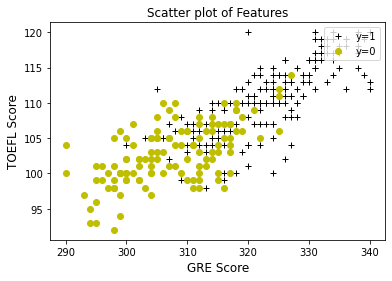

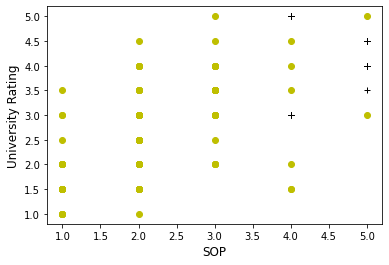

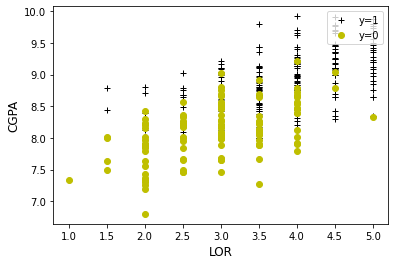

In [11]:
plot_data(X_train[:,:2], y_train, pos_label="y=1", neg_label="y=0")    
plt.xlabel('GRE Score', fontsize=12)
plt.ylabel('TOEFL Score', fontsize=12)
plt.legend(loc="upper right")
plt.title('Scatter plot of Features')
plt.show()

plot_data(X_train[:,2:4], y_train, pos_label="y=1", neg_label="y=0")    
plt.xlabel('SOP', fontsize=12)
plt.ylabel('University Rating', fontsize=12)
plt.show()

plot_data(X_train[:,4:6], y_train, pos_label="y=1", neg_label="y=0")    
plt.xlabel('LOR', fontsize=12)
plt.ylabel('CGPA', fontsize=12)
plt.legend(loc="upper right")
plt.show()

### Normalization of Data

To ensure all features have same range or similar range.

In [12]:
#import Scaler
#using pipeline on a training set so as to be able to later re-apply the same transformation on the testing set.

from sklearn.pipeline import make_pipeline

#using minmax to ensure scaling to the same unit size
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.decomposition import IncrementalPCA

# add multiple models per need
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve



#### Defining a Pipeline Logistic Model for use later
>Step 1 :  Normalization (StandardScaler/MinMaxScaler)  
>Step 2 : Applying Logistic Regression


In [13]:
class create_logistic_model:
  def __init__(self, X_train=X_train, y_train=y_train,X_test=X_test,y_test=y_test, normalizer=StandardScaler(),alg=LogisticRegression()):
    self.pipe = make_pipeline(normalizer, alg)
    self.pipe.fit(X_train, y_train)
    '''Implement linear supervised machine learning framework. 
    X: Training features, y=training label, 
    norm= type of normalizer function as used scikit, 
    alg: type of supervised learning algorithm as used in scikit'''
    self.X_train, self.y_train, self.X_test, self.y_test, self.normalizer, self.alg = X_train, y_train,X_test, y_test, normalizer,alg


  @property
  def coeff_(self):
    '''Return model coefficients'''
    return self.pipe.named_steps.logisticregression.coef_


  @property
  def intercept_(self):
    '''Return model intercept'''
    return self.pipe.named_steps.logisticregression.intercept_

  # predicting on training dataset
  @property
  def y_train_predict(self):
    '''Predict from the training dataset'''
    return self.pipe.predict(X_train)

  @property
  def y_test_predict(self):
    '''Predict class from test dataset'''
    return self.pipe.predict(X_test)

  
  # evaluating the model on training dataset

  @property
  def accuracy_train(self):
    return accuracy_score(self.y_train, self.y_train_predict)
  
  @property
  def precision_train(self): 
    return precision_score(self.y_train, self.y_train_predict)

  @property
  def recall_train(self):
    return recall_score(self.y_train, self.y_train_predict)



  # evaluating the model on test dataset

  @property
  def accuracy_test(self):
    return accuracy_score(self.y_test, self.y_test_predict)
  
  @property
  def precision_test(self): 
    return precision_score(self.y_test, self.y_test_predict)

  @property
  def recall_test(self):
    return recall_score(self.y_test, self.y_test_predict)

  @property
  def roc_auc (self): #ROC AUC Score
    return roc_auc_score(self.y_test,self.pipe.predict_proba(self.X_test)[:,1])

  @property
  def roc_curve (self):
    return roc_curve(self.y_test, self.pipe.predict_proba(self.X_test)[:,1])


  @property
  def score(self):
    print("The normalizer is {}".format(self.normalizer))
    print("\n")

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("Accuracy Score of training set is {}".format(self.accuracy_train))
    print("Precision of training set is {}".format(self.precision_train))
    print("Recall score of training set is {}".format(self.recall_train))
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Accuracy Score of test set is {}".format(self.accuracy_test))
    print("Precision of test set is {}".format(self.precision_test))
    print("Recall score of test set is {}".format(self.recall_test))
    print("ROC AUC score is {}".format(self.roc_auc))
    print("\n")





#### Defining a Pipeline for Logistic Regression using Principal Component Analysis
>Step 1 :  Normalization (StandardScaler/MinMaxScaler)  
>Step 2 :  Principal Component Analysis to reduce dimensionality  
>Step 3 :  Applying Logistic Regression

In [14]:
# Principal Component Analysis (PCA) added to pipeline
class create_pca_logistic_model:
  def __init__(self, X_train=X_train, y_train=y_train,X_test=X_test,y_test=y_test, normalizer=StandardScaler(),pca =IncrementalPCA(n_components = 2) ,alg=LogisticRegression()):
    self.pipe = make_pipeline(normalizer, pca, alg)
    self.pipe.fit(X_train, y_train)
    '''Implement linear supervised machine learning framework with PCA capability. 
    X: Training features, y=training label, 
    norm= type of normalizer function as used scikit, pca,
    alg: type of supervised learning algorithm as used in scikit'''
    self.X_train, self.y_train, self.X_test, self.y_test, self.normalizer,self.pca, self.alg = X_train, y_train,X_test, y_test, normalizer,pca ,alg

  @property
  def X_train_pca (self):
    '''Return the transformed training data set'''
    return self.pipe.named_steps.incrementalpca.fit_transform(X_train)


  @property
  def coeff_(self):
    '''Return model coefficients'''
    return self.pipe.named_steps.logisticregression.coef_


  @property
  def intercept_(self):
    '''Return model intercept'''
    return self.pipe.named_steps.logisticregression.intercept_

  # predicting on training dataset
  @property
  def y_train_predict(self):
    '''Predict from the training dataset'''
    return self.pipe.predict(X_train)

  @property
  def y_test_predict(self):
    '''Predict class from test dataset'''
    return self.pipe.predict(X_test)

  
  # evaluating the model on training dataset

  @property
  def accuracy_train(self):
    return accuracy_score(self.y_train, self.y_train_predict)
  
  @property
  def precision_train(self): 
    return precision_score(self.y_train, self.y_train_predict)

  @property
  def recall_train(self):
    return recall_score(self.y_train, self.y_train_predict)



  # evaluating the model on test dataset

  @property
  def accuracy_test(self):
    return accuracy_score(self.y_test, self.y_test_predict)
  
  @property
  def precision_test(self): 
    return precision_score(self.y_test, self.y_test_predict)

  @property
  def recall_test(self):
    return recall_score(self.y_test, self.y_test_predict)

  @property
  def roc_auc (self): #ROC AUC Score
    return roc_auc_score(self.y_test,self.pipe.predict_proba(self.X_test)[:,1])

  @property
  def roc_curve (self):
    return roc_curve(self.y_test, self.pipe.predict_proba(self.X_test)[:,1])


  @property
  def score(self):
    print("The normalizer is {}".format(self.normalizer))
    print("\n")

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("Accuracy Score of training set is {}".format(self.accuracy_train))
    print("Precision of training set is {}".format(self.precision_train))
    print("Recall score of training set is {}".format(self.recall_train))
    
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("Accuracy Score of test set is {}".format(self.accuracy_test))
    print("Precision of test set is {}".format(self.precision_test))
    print("Recall score of test set is {}".format(self.recall_test))
    print("ROC AUC score is {}".format(self.roc_auc))
    print("\n")





### Load Models

In [15]:
#Model1 - 
NLRS = create_logistic_model() # #Normalized-Logistic Regression-StandardScaler

#Model2
NLRM = create_logistic_model(normalizer=MinMaxScaler()) #Normalized-Logistic Regression-MinMaxScaler

#Model3
NPLRM = create_pca_logistic_model(normalizer=MinMaxScaler(),pca=IncrementalPCA(n_components = 4))

## Data Results & Discussions



#### Majority Class Accuracy 
> What is the accuracy when you predict the majority class for all observations ? 

In [16]:
# Model Accuracy
# The % Accuracy of predicting the majority class for training set
print("Training Set")
print("-----------------------------------------------------")
print("Total Number of students is {}".format(len(y_train)))
print("Number of majority class is {}".format(len(y_train[y_train==1])))
print("Percent of majority class is {}".format(len(y_train[y_train==1])/len(y_train)))

print("\n")
print("Test Set")
print("-----------------------------------------------------")
print("Total Number of students is {}".format(len(y_test)))
print("Number of majority class is {}".format(len(y_test[y_test==1])))
print("Percent of majority class is {}".format(len(y_test[y_test==1])/len(y_test)))

Training Set
-----------------------------------------------------
Total Number of students is 320
Number of majority class is 199
Percent of majority class is 0.621875


Test Set
-----------------------------------------------------
Total Number of students is 80
Number of majority class is 48
Percent of majority class is 0.6


In the training set, predicting the majority class will be correct **62 %** of the time and **60%** correct in the Test dataset. 

This helps to give context to the performance of our model and to know whether the model is just predicting the majority class. Also, the difference between the model performance and the accuracy of predicting the majority class is a good indicator of the performance of any model. (**The higher the difference the better the model performance**)

#### Scoring Our Models 

> **NLRM** :Normalized - Logistic Regression - MinMaxScaler (Model 1)  
> **NLRS** :Normalized - Logistic regression - StandardScaler (Model 2)   
> **NPLRM** : Normalized - PCA - Logistic Regression - MinMaxScaler (Model 3)


In [17]:
#Model1
NLRM.score

#Model2
NLRS.score

#Model3
NPLRM.score


The normalizer is MinMaxScaler()


The model performance for the training set
-------------------------------------------
Accuracy Score of training set is 0.821875
Precision of training set is 0.8446601941747572
Recall score of training set is 0.8743718592964824
The model performance for the test set
-------------------------------------------
Accuracy Score of test set is 0.9
Precision of test set is 0.9166666666666666
Recall score of test set is 0.9166666666666666
ROC AUC score is 0.9563802083333333


The normalizer is StandardScaler()


The model performance for the training set
-------------------------------------------
Accuracy Score of training set is 0.690625
Precision of training set is 0.9901960784313726
Recall score of training set is 0.507537688442211
The model performance for the test set
-------------------------------------------
Accuracy Score of test set is 0.7625
Precision of test set is 1.0
Recall score of test set is 0.6041666666666666
ROC AUC score is 0.96484375



#### Model Evaluation

*   Accuracy : **NLRM** > NPLRM > *NLRS*  
*   Precision: **NLRS** > NLRM  > *NPLRM*  
*   Recall   : **NLRM** > NPLRM > *NLRS*  
*   ROC AUC  : **NLRS** > NLRM  > *NPLRM*   

#### ROC AUC Curve Comparison 

Standard: ROC AUC=0.965
MinMax: ROC AUC=0.956
PCA (n=4): ROC AUC=0.953


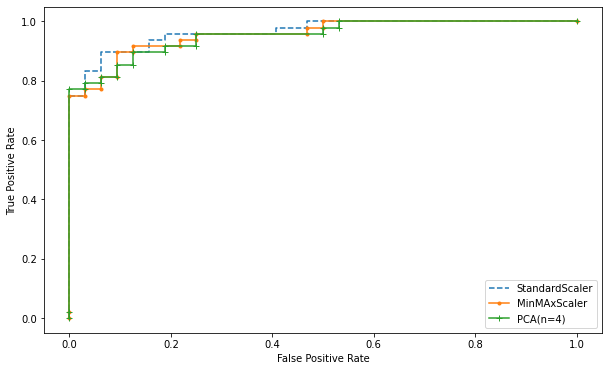

In [18]:
# calculate scores
NLRS_auc,NLRS_roc_curve = NLRS.roc_auc,NLRS.roc_curve
NLRM_auc, NLRM_roc_curve = NLRM.roc_auc,NLRM.roc_curve
NPLRM_auc, NPLRM_roc_curve = NPLRM.roc_auc, NPLRM.roc_curve

# summarize scores
print('Standard: ROC AUC=%.3f' % (NLRS_auc))
print('MinMax: ROC AUC=%.3f' % (NLRM_auc))
print('PCA (n=4): ROC AUC=%.3f' % (NPLRM_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = NLRS_roc_curve
lr_fpr, lr_tpr, _ = NLRM_roc_curve
pr_fpr, pr_tpr, _ = NPLRM_roc_curve
# plot the roc curve for the model
plt.figure(figsize = (10, 6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='StandardScaler')
plt.plot(lr_fpr, lr_tpr, marker='.', label='MinMAxScaler')
plt.plot(pr_fpr, pr_tpr, marker='+',label='PCA(n=4)' )
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

##  Results & Discussions

> All models perform better on the out of sample dataset or the test dataset. This indicates that the models generalize well and there are no hints of overfitting since model performance increase from training set to test set. 

> The MinMax scaled logistic regression performs better at predicting correctly and has a higher recall score. The Standard Scaler on the other hand, has high (perfect) recall score and a marginally higher ROC AUC. 

> All models perform better than just predicting the majority class (1 or Admit) for all observations.

> PCA reduced model performed worse than the other MinMax model. This is likely because of the importance of all the feautures in admission decisions in the past. It is quick method to reduce dimensionality in data.

> In all, Model 1 performed the best in Accuracy & Recall, 2nd best in Precision & ROC AUC. Model 1 is slected for future classification due to that.

> MinMax works better than StandardScaler in this case because of the relative importance of all the features in admission decision. MinMax takes care this by scaling all observations between 0-1 for all features.

